<a href="https://colab.research.google.com/github/christian-amarildo/Computacao_grafica_Trabalho/blob/main/comp_grafica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Roteiro 1 - Processamento Digital de Imagens (PDI)

**Aluno:** Christian Amarildo Amorim Morais
**Matrícula** 202304940016
**Data de Entrega:** 30/08/2025  
**E-mail Enviado:** josivanreis.edu@gmail.com  

Este notebook contém as respostas para as questões do Roteiro 1. Todas as implementações foram realizadas no Google Colab, utilizando OpenCV e NumPy para processamento de imagens. As imagens estão localizadas na pasta "imagens PDI" no Google Drive.


## Código 1 — Instalação do OpenCV (opencv-python)


In [ ]:
!pip install opencv-python --upgrade

## Código 2 — Montagem do Google Drive e definição do caminho das imagens


In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive

drive.mount('/content/drive')

image_path = '/content/drive/My Drive/processamento-de-imagem/image pdi/'


ValueError: mount failed

## Questão 1: Explicação do Processamento de Filtro 3x3 em Imagem 30x30 Pixels

Tendo uma imagem de tamanho 30x30 pixels, explique como acontece o processamento de um filtro de tamanho 3x3, ou seja, como esse filtro passa pela imagem?

**Resposta:**  
O processamento de um filtro de tamanho 3x3 em uma imagem de 30x30 pixels ocorre de forma sistemática, começando pelo posicionamento inicial: o filtro de 3x3 é colocado no canto superior esquerdo da imagem, cobrindo os primeiros 9 pixels (3x3). Em seguida, vem o cálculo: para cada pixel na área coberta pelo filtro, seu valor é multiplicado pelo valor correspondente na janela do filtro; todos esses resultados de multiplicação são somados, e essa soma total se tornará o novo valor do pixel central da área coberta.  

Após o cálculo, há o deslizamento: o filtro desliza para a direita, tipicamente um pixel por vez, e repete o processo — esse movimento é chamado de "passo" ou "stride". O processo continua linha por linha: quando o filtro chega ao final da primeira linha da imagem, ele se move para baixo, voltando para o lado esquerdo, e continua o processo na próxima linha.  

Finalmente, o processamento completo: esse processo se repete até que o filtro tenha percorrido toda a imagem, cobrindo todos os pixels possíveis. O resultado final é uma nova imagem, onde cada pixel foi recalculado com base em seus vizinhos e nos valores do filtro.  

Para um exemplo simples, considere uma pequena imagem 3x3 com valores [[1, 2, 3], [4, 5, 6], [7, 8, 9]] e um filtro [[0, 1, 0], [1, 0, 1], [0, 1, 0]]. O cálculo para o pixel central seria: (2*1) + (4*1) + (6*1) + (8*1) = 2 + 4 + 6 + 8 = 20, que se torna o novo valor central. Em uma imagem maior como 30x30, esse processo é repetido deslizando o filtro por toda a extensão.

## Questão 2: Transformação de Intensidade Negativa na Imagem "mamografia"

Leia a imagem chamada mamografia e aplique a transformação de intensidade de imagem negativa. Para essa transformação não pode utilizar biblioteca pronta, você irá implementar o algoritmo que realize a transformação da imagem em negativa. Ao final, exibe as duas imagens (original e a modificada).

## Código 3 — Correção Gama (γ = 0,8) em `mamografia.png`


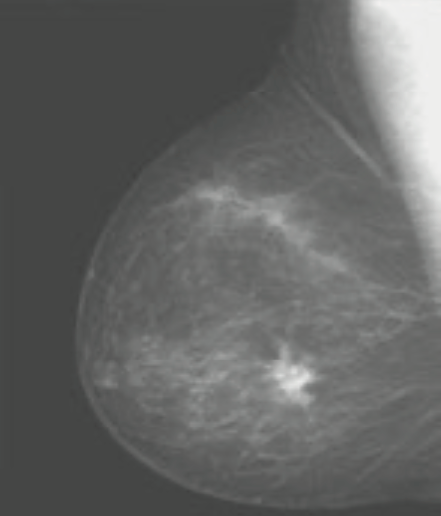

In [ ]:


image = cv2.imread(image_path+'mamografia.png')

gama = 0.8

gamma_corrected = np.array(255*(image / 255) ** gama, dtype = 'uint8')

cv2_imshow(gamma_corrected)


## Código 4 — Geração da imagem **negativa**


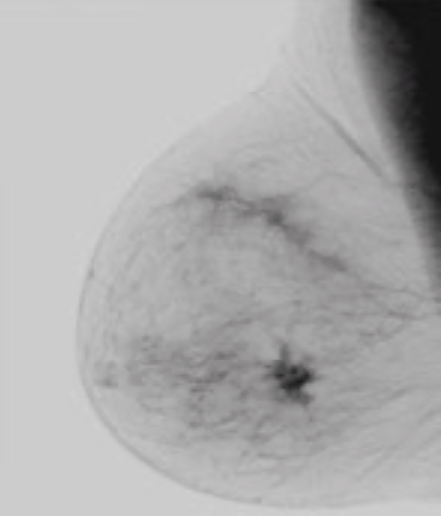

In [ ]:
def negative_image(image):
  negative_img = image.copy()

  for i in range(negative_img.shape[0]):
    for j in range(negative_img.shape[1]):
      if len(negative_img.shape) == 2 or negative_img.shape[2] == 1:
        negative_img[i, j] = 255 - negative_img[i, j]
      else:
        for c in range(negative_img.shape[2]):
          negative_img[i, j, c] = 255 - negative_img[i, j, c]

  return negative_img

negative_mama_image = negative_image(image)
cv2_imshow(negative_mama_image)

## Questão 3: Transformação de Intensidade Logarítmica na Imagem "espectro"

Aplicando a transformação de intensidade logarítmica s = c log(1 + r), leia a imagem chamada espectro e gere três imagens, variando o c com os valores {1, 30, 40}.

## Código 5 — Transformação Logarítmica em `espectro.png`


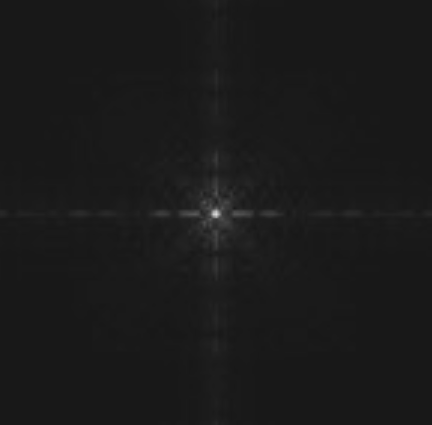

Logarithmic transformation with c = 1


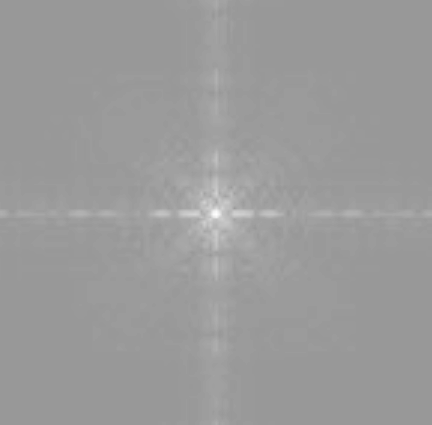

Logarithmic transformation with c = 30


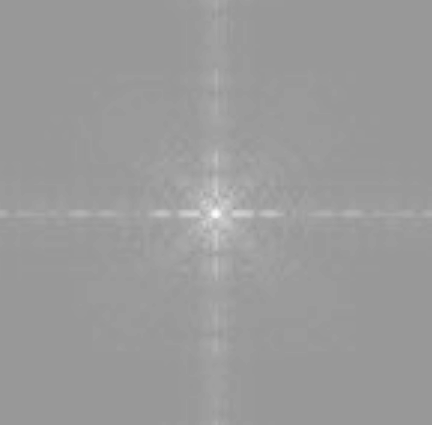

Logarithmic transformation with c = 40


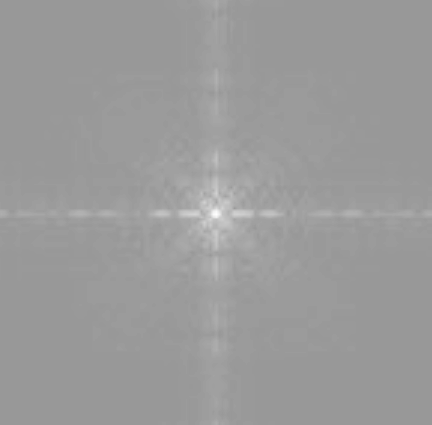

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

try:
  espectro_image = cv2.imread(image_path + 'espectro.png', 0)
  cv2_imshow(espectro_image)

  if espectro_image is None:
    print("Error: 'espectro.png' not found. Please check the image_path and filename.")
  else:
    c_values = [1, 30, 40]

    for c in c_values:
      # s = c * log(1 + r)
      s = c * np.log(1 + espectro_image)

      # Normalize the image to the range [0, 255] for display
      s = np.uint8(255 * s / np.max(s))

      # Display the resulting image
      print(f"Logarithmic transformation with c = {c}")
      cv2_imshow(s)

except Exception as e:
  print(f"An error occurred: {e}")

## Questão 4: Filtro para Ruído "Salt-and-Pepper" na Imagem "placa_circuito"

Em uma imagem com ruído “Salt-and-Pepper”, qual o melhor filtro que você utilizaria para remover este ruído? Justifique o filtro utilizado. Implementa o filtro escolhido na imagem chamada placa_circuito. Em seguida, exiba as imagens: original e a processada.

**Resposta (Justificativa):**  
O filtro de mediana é o mais adequado para tratar esse tipo de ruído, uma vez que remove pontos isolados (outliers como pixels muito claros ou escuros) sem desfocar excessivamente a imagem. Diferente de filtros como o gaussiano, que suavizam bordas, a mediana preserva melhor as arestas enquanto corrige os pixels afetados pelo ruído salt-and-pepper.

## Código 6 — Filtro de Mediana aplicado em `placa.png`


In [2]:
import cv2
import matplotlib.pyplot as plt

# 1. Carregar imagem
img = cv2.imread(image_path +"placa.png", cv2.IMREAD_GRAYSCALE)

# 2. Aplicar filtro da mediana (kernel 3x3 ou 5x5 dependendo do ruído)
median = cv2.medianBlur(img, 5)  # experimente também 5

# 3. Exibir imagens
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Imagem Original")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Filtro da Mediana")
plt.imshow(median, cmap="gray")
plt.axis("off")

plt.show()


NameError: name 'image_path' is not defined

## Questão 5: Histogramas e Equalização nas Imagens "pole1", "pole2", "pole3" e "pole4"

Nas imagens chamadas: pole1, pole2, pole3 e pole4, demonstre seus respectivos histograma. Em seguida, utilizando o método de equalização de histograma estudado, aplique nas imagens e posteriormente compare o original com o equalizado e explique o que aconteceu.

In [1]:
# Lista de imagens (assumindo .png - ajuste se necessário)
pole_images = ['pole1.png', 'pole2.png', 'pole3.png', 'pole4.png']

for img_name in pole_images:
    # Carregar imagem em tons de cinza
    img = cv2.imread(image_path + img_name, cv2.IMREAD_GRAYSCALE)

    # Calcular e exibir histograma original
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 2, 1)
    plt.title(f"Imagem Original: {img_name}")
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.title(f"Histograma Original: {img_name}")
    plt.hist(img.ravel(), 256, [0, 256])
    plt.xlabel('Intensidade')
    plt.ylabel('Frequência')

    # Aplicar equalização de histograma
    equalized = cv2.equalizeHist(img)

    # Exibir imagem equalizada
    plt.subplot(2, 2, 3)
    plt.title(f"Imagem Equalizada: {img_name}")
    plt.imshow(equalized, cmap='gray')
    plt.axis('off')

    # Calcular e exibir histograma equalizado
    plt.subplot(2, 2, 4)
    plt.title(f"Histograma Equalizado: {img_name}")
    plt.hist(equalized.ravel(), 256, [0, 256])
    plt.xlabel('Intensidade')
    plt.ylabel('Frequência')

    plt.tight_layout()
    plt.show()

NameError: name 'cv2' is not defined